In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [2]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['mpg'] = y_train
    
    formula = 'mpg~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    return model.summary()

In [18]:
data = pd.read_csv('auto-mpg.csv')
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']



## Baseline Model

In [19]:
y = data[['mpg']]
X = data[['weight', 'acceleration', 'year', 'origin']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<AxesSubplot:ylabel='Frequency'>

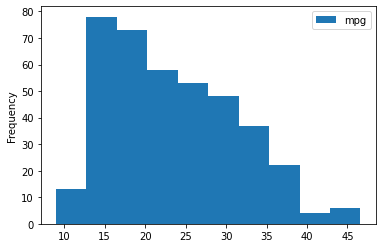

In [21]:
y.plot(kind='hist')

In [6]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.827033790091839
Test R2:  0.7785909799528492
Train RMSE:  3.2076227571481315
Test RMSE:  3.801606614801689


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     368.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          5.68e-116
Time:                        11:59:39   Log-Likelihood:                -808.94
No. Observations:                 313   AIC:                             1628.
Df Residuals:                     308   BIC:                             1647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.7719      4.438     -3.779      0.000     -25.504      -8.040
weight          -0.0060      0.000    -20.137      0.000      -0.007      -0.005
acceleration     0.0009      0.076      0.012      0.991      -0.148       0.150
year             0.7433      0.053     13.960      0.000       0.639       0.848
origin           0.9616      0.284      3.389      0.001       0.403       1.520
==============================================================================
Omnibus:                       27.174   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.556
Skew:                           0.520   Prob(JB):                     4.71e-11
Kurtosis:                       4.601   Cond. No.                     7.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

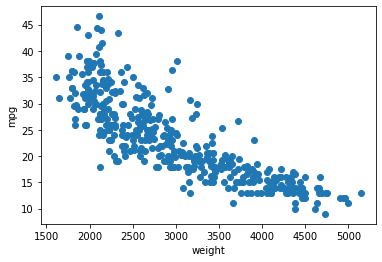

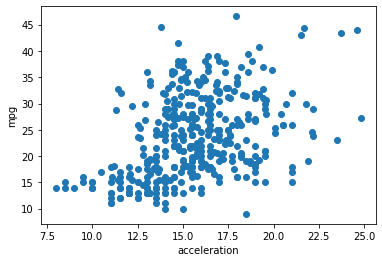

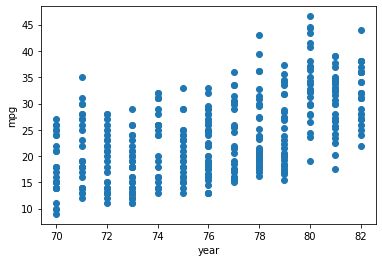

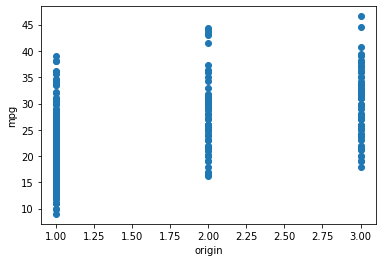

In [7]:
for col in X.columns:
    fig = plt.figure
    ax = plt.gca()
    ax.scatter(X[col], y)
    
    ax.set_xlabel(col)
    ax.set_ylabel('mpg')
    
    plt.show()

## Log-Transform Weight

In [31]:
y = data[['mpg']]
X = data[['weight', 'acceleration', 'year', 'origin']]
X['log_weight'] = np.log(X['weight'])

<ipython-input-31-f90763eca8e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_weight'] = np.log(X['weight'])


In [ ]:
np.log

<AxesSubplot:ylabel='Frequency'>

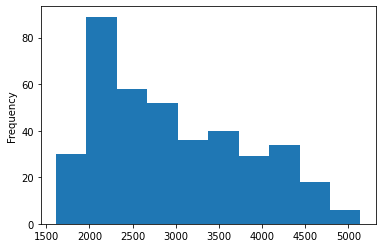

In [33]:
data['weight'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

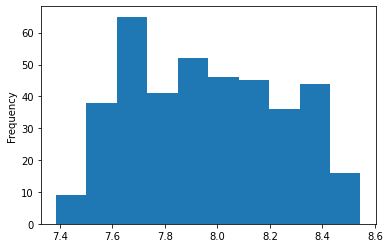

In [34]:
X['log_weight'].plot(kind='hist')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.8445072551752135
Test R2:  0.8278036401052529
Train RMSE:  3.111532824978029
Test RMSE:  3.071580509902358


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     418.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          4.37e-123
Time:                        12:09:22   Log-Likelihood:                -799.42
No. Observations:                 313   AIC:                             1609.
Df Residuals:                     308   BIC:                             1628.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      110.9265      8.733     12.702      0.000      93.743     128.110
weight         -18.5580      0.847    -21.916      0.000     -20.224     -16.892
acceleration     0.0751      0.070      1.075      0.283      -0.062       0.212
year             0.7584      0.051     14.756      0.000       0.657       0.859
origin           0.9233      0.282      3.278      0.001       0.369       1.478
==============================================================================
Omnibus:                       34.880   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.433
Skew:                           0.567   Prob(JB):                     1.53e-17
Kurtosis:                       5.157   Cond. No.                     3.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

"If we increase x by one percent, we expect y to increase by (β1/100) units of y."

## Transforming Dependent Variable

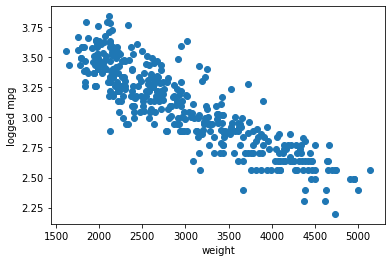

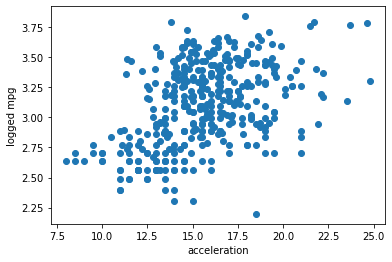

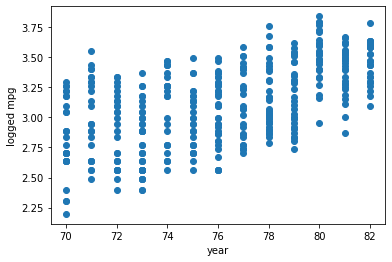

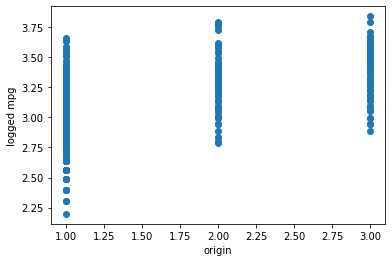

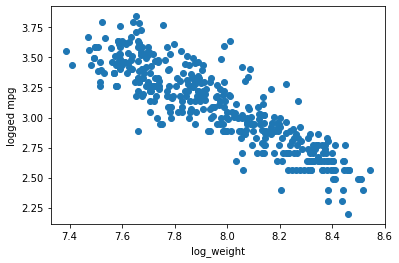

In [37]:
for col in X.columns:
    fig = plt.figure
    ax = plt.gca()
    ax.scatter(X[col], np.log(y))
    
    ax.set_xlabel(col)
    ax.set_ylabel('logged mpg')
    
    plt.show()

## Log-Transform MPG

In [40]:
data = pd.read_csv('auto-mpg.csv')
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

y = np.log(data[['mpg']])
X = data[['weight', 'acceleration', 'year', 'origin']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model(X_train, X_test, y_train, y_test)

Train R2:  0.8792547289463692
Test R2:  0.8590792995131654
Train RMSE:  0.11667244762116381
Test RMSE:  0.13289988191701343


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     560.7
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          5.53e-140
Time:                        12:18:35   Log-Likelihood:                 228.32
No. Observations:                 313   AIC:                            -446.6
Df Residuals:                     308   BIC:                            -427.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5098      0.161      9.362      0.000       1.192       1.827
weight          -0.0003   1.05e-05    -27.222      0.000      -0.000      -0.000
acceleration     0.0053      0.003      1.951      0.052   -4.41e-05       0.011
year             0.0306      0.002     15.374      0.000       0.027       0.034
origin           0.0287      0.010      2.821      0.005       0.009       0.049
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                7.279
Skew:                          -0.224   Prob(JB):                       0.0263
Kurtosis:                       3.598   Cond. No.                     7.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Frequency'>

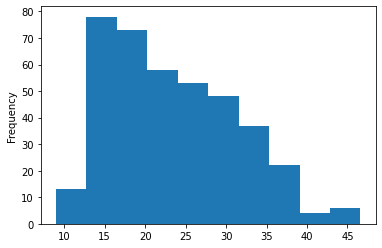

In [41]:
data['mpg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

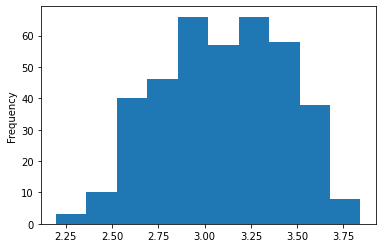

In [42]:
np.log(data['mpg']).plot(kind='hist')

### Unscale!!

In [45]:
np.exp(linreg.predict(X_train))


array([[37.22159078],
       [32.04568535],
       [14.31469395],
       [26.83480725],
       [22.04549419],
       [30.23622195],
       [24.51372099],
       [16.53643161],
       [13.37209602],
       [21.52603226],
       [17.33843013],
       [14.3331495 ],
       [22.40209952],
       [26.39875832],
       [25.54030914],
       [13.79932342],
       [31.72024549],
       [30.34489712],
       [12.54570325],
       [12.8461509 ],
       [34.66947421],
       [24.46582724],
       [29.70706468],
       [23.22939664],
       [18.78533577],
       [20.89203672],
       [31.72593692],
       [32.65009745],
       [17.2251344 ],
       [19.3754307 ],
       [25.67436891],
       [22.49897785],
       [17.43281548],
       [26.21784694],
       [17.24080628],
       [13.89049635],
       [24.54562536],
       [30.89574718],
       [12.75108783],
       [31.10218666],
       [35.11940854],
       [21.65561698],
       [14.71682872],
       [21.52796224],
       [19.61260384],
       [15

In [46]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = np.exp(linreg.predict(X_train))
y_hat_test = np.exp(linreg.predict(X_test))

train_mse = mean_squared_error(np.exp(y_train), y_hat_train)
test_mse = mean_squared_error(np.exp(y_test), y_hat_test)

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train RMSE:  2.8819213813595868
Test RMSE:  3.1863066688004453
